## Recognising HandWritten Digits on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Step1. Data Preparation

In [2]:
df=pd.read_csv('mnist_train.csv')



In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [5]:
X=data[:,1:]
Y=data[:,0]
#first pixel stores the label(no it represents)of the image
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [6]:
split=int(0.8*X.shape[0])
print(split)

X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


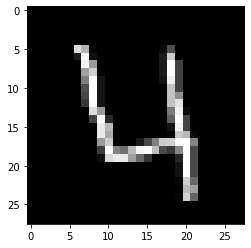

In [9]:
#Visualise the some samples

def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(X_train[3])


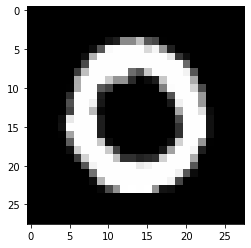

In [10]:
drawImg(X_train[1])


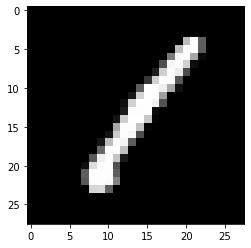

In [11]:
drawImg(X_train[0])


## Step2. K-NN

In [25]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

## Step3. Make predictions

In [27]:
pred=knn(X_train,Y_train,X_test[0])
print(int(pred))

0


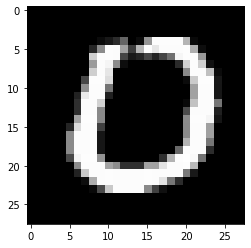

0


In [32]:
drawImg(X_test[0])
print(Y_test[0])

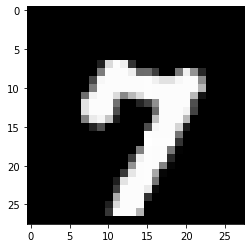

7


In [28]:
drawImg(X_test[1])
print(Y_test[1])

In [29]:
pred=knn(X_train,Y_train,X_test[1])
print(int(pred))

7


In [30]:
#Time O(NQ) ->No of Dimensions X No of Samples  [Test]
#O(1) [Train]

#Non parameteric algorithm-> no parametrs are learned
print(X_test.shape)

(8400, 784)


In [ ]:
#Accuracy over the entire test data

acc=0.0
sumofPred=0.0
for i in X_test[:20,:]:
    p=knn(X_train,Y_train,X_test[i])
    sumofPred+=((p==Y_test[i]))
    
acc=sumofPred/X_test.shape[0]
  
print(acc)
